<a href="https://colab.research.google.com/github/Auvarmf/Artificial-Intelligence/blob/main/MetodeFuzzyAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metode Fuzzy

## Penerapan Metode Tsukamoto


---


Menggunakan data sebagai berikut

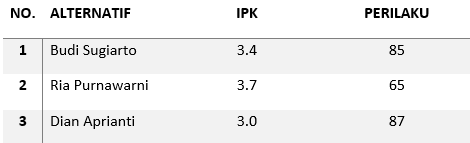


---



## Library

In [14]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [15]:
# inisialisasi variabel input
ipk = ctrl.Antecedent(np.arange(0, 4.5, 0.5), 'ipk')
perilaku = ctrl.Antecedent(np.arange(0, 101, 1), 'perilaku')
keputusan = ctrl.Consequent(np.arange(0, 101, 1), 'keputusan')

In [16]:
# fungsi keanggotaan untuk variabel input "ipk"
ipk['buruk'] = fuzz.trapmf(ipk.universe, [0, 0, 2, 2.5])
ipk['cukup'] = fuzz.trimf(ipk.universe, [2, 3, 3.5])
ipk['baik'] = fuzz.trapmf(ipk.universe, [3, 3.5, 4.5, 4.5])

# fungsi keanggotaan untuk variabel input "perilaku"
perilaku['buruk'] = fuzz.trapmf(perilaku.universe, [0, 0, 50, 65])
perilaku['cukup'] = fuzz.trimf(perilaku.universe, [50, 75, 100])
perilaku['baik'] = fuzz.trapmf(perilaku.universe, [65, 75, 100, 100])

In [17]:
# fungsi keanggotaan untuk variabel output "keputusan"
keputusan['rendah'] = fuzz.trapmf(keputusan.universe, [0, 0, 50, 65])
keputusan['sedang'] = fuzz.trimf(keputusan.universe, [50, 75, 100])
keputusan['tinggi'] = fuzz.trapmf(keputusan.universe, [65, 75, 100, 100])

# membuat aturan fuzzy dengan menggunakan control system
rule1 = ctrl.Rule(ipk['buruk'] | perilaku['buruk'], keputusan['rendah'])
rule2 = ctrl.Rule(ipk['cukup'] & perilaku['cukup'], keputusan['sedang'])
rule3 = ctrl.Rule(ipk['baik'] | perilaku['baik'], keputusan['tinggi'])

# membuat control system
keputusan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])

In [18]:
# melakukan simulasi untuk setiap data pada dataframe
df = pd.DataFrame({
    'Nama': ['Budi Sugianto', 'Ria Purwani', 'Dian Aprianti'],
    'IPK': [3.4, 3.7, 3.0],
    'Perilaku': [85, 65, 65]
})
df

,Nama,IPK,Perilaku
0,Budi Sugianto,3.4,85
1,Ria Purwani,3.7,65
2,Dian Aprianti,3.0,65


In [19]:
for i, row in df.iterrows():
    keputusan_simulasi = ctrl.ControlSystemSimulation(keputusan_ctrl)
    keputusan_simulasi.input['ipk'] = row['IPK']
    keputusan_simulasi.input['perilaku'] = row['Perilaku']
    keputusan_simulasi.compute()
    df.loc[i, 'Keputusan'] = keputusan_simulasi.output['keputusan']

# menampilkan hasil keputusan untuk setiap data
df

,Nama,IPK,Perilaku,Keputusan
0,Budi Sugianto,3.4,85,82.741081
1,Ria Purwani,3.7,65,84.861111
2,Dian Aprianti,3.0,65,75.000000
